In [1]:
import pandas as pd 
import numpy as np 

In [2]:
bld = pd.read_csv('building_info.csv')
smp = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:


# Rename columns
bld.rename(columns={
    "건물번호": "Building Number",
    "건물유형": "Building Type",
    "연면적(m2)": "Total Floor Area (m²)",
    "냉방면적(m2)": "Air-conditioned Area (m²)",
    "태양광용량(kW)": "Solar Power Capacity (kW)",
    "ESS저장용량(kWh)": "ESS Storage Capacity (kWh)",
    "PCS용량(kW)": "PCS Capacity (kW)"
}, inplace=True)
building_type_map = {
    '호텔': 'Hotel',
    '상용': 'Commercial',
    '병원': 'Hospital',
    '학교': 'School',
    '건물기타': 'Other Building',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '백화점': 'Department Store',
    'IDC(전화국)': 'IDC (Telecom Center)',
    '공공': 'Public Facility'
}

bld['Building Type'] = bld['Building Type'].replace(building_type_map)
test.rename(columns={
    
    "건물번호": "Building Number",
    "일시": "Datetime",
    "기온(°C)": "Temperature (°C)",
    "강수량(mm)": "Precipitation (mm)",
    "풍속(m/s)": "Wind Speed (m/s)",
    "습도(%)": "Humidity (%)"
}, inplace=True)

train.rename(columns={
    "건물번호": "Building Number",
    "일시": "Datetime",
    "기온(°C)": "Temperature (°C)",
    "강수량(mm)": "Precipitation (mm)",
    "풍속(m/s)": "Wind Speed (m/s)",
    "습도(%)": "Humidity (%)",
    "일조(hr)": "Sunshine Duration (hr)",
    "일사(MJ/m2)": "Solar Radiation (MJ/m²)",
    "전력소비량(kWh)": "Power Consumption (kWh)"
}, inplace=True)





In [6]:
train['Datetime'] = pd.to_datetime(train['Datetime'])
train['Hour'] = train['Datetime'].dt.hour
train['Day'] = train['Datetime'].dt.day


In [7]:
test['Datetime'] = pd.to_datetime(test['Datetime'])
test['Hour'] = test['Datetime'].dt.hour
test['Day'] = test['Datetime'].dt.day

In [8]:
train = train.merge(bld[['Building Number','Air-conditioned Area (m²)', 'Total Floor Area (m²)', 'Building Type']], on='Building Number', how='left')

In [9]:
train.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Sunshine Duration (hr),Solar Radiation (MJ/m²),Power Consumption (kWh),Hour,Day,Air-conditioned Area (m²),Total Floor Area (m²),Building Type
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,0,1,77586.0,82912.71,Hotel
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,1,1,77586.0,82912.71,Hotel
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2,1,77586.0,82912.71,Hotel
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,3,1,77586.0,82912.71,Hotel
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,4,1,77586.0,82912.71,Hotel


In [10]:
train.columns

Index(['num_date_time', 'Building Number', 'Datetime', 'Temperature (°C)',
       'Precipitation (mm)', 'Wind Speed (m/s)', 'Humidity (%)',
       'Sunshine Duration (hr)', 'Solar Radiation (MJ/m²)',
       'Power Consumption (kWh)', 'Hour', 'Day', 'Air-conditioned Area (m²)',
       'Total Floor Area (m²)', 'Building Type'],
      dtype='object')

In [11]:
bld.head()

,Building Number,Building Type,Total Floor Area (m²),Air-conditioned Area (m²),Solar Power Capacity (kW),ESS Storage Capacity (kWh),PCS Capacity (kW)
0,1,Hotel,82912.71,77586.00,-,-,-
1,2,Commercial,40658.90,30392.82,-,-,-
2,3,Hospital,560431.00,418992.00,278.58,-,-
3,4,Hotel,41813.29,23715.71,-,-,-
4,5,School,403749.39,248507.00,1983.05,1025,250


In [ ]:
import pandas as pd
import numpy as np

def prepare_features(train_df, test_df):
    # Combine train + test for lag/rolling calculations
    train_df['is_train'] = 1
    test_df['is_train'] = 0
    full_df = pd.concat([train_df, test_df], ignore_index=True)

    # Ensure datetime is in proper format
    full_df['Datetime'] = pd.to_datetime(full_df['Datetime'])

    # -------- Time-based features --------
    full_df['Month'] = full_df['Datetime'].dt.month
    full_df['DayOfWeek'] = full_df['Datetime'].dt.weekday
    full_df['Week'] = full_df['Datetime'].dt.isocalendar().week
    full_df['is_weekend'] = (full_df['DayOfWeek'] >= 5).astype(int)

    # Cyclic encoding
    full_df['Hour_sin'] = np.sin(2 * np.pi * full_df['Hour']/24)
    full_df['Hour_cos'] = np.cos(2 * np.pi * full_df['Hour']/24)
    full_df['DayOfWeek_sin'] = np.sin(2 * np.pi * full_df['DayOfWeek']/7)
    full_df['DayOfWeek_cos'] = np.cos(2 * np.pi * full_df['DayOfWeek']/7)

    # -------- Lag & Rolling features (grouped by building) --------
    full_df = full_df.sort_values(['Building Number', 'Datetime'])
    full_df['Lag_1h'] = full_df.groupby('Building Number')['Power Consumption (kWh)'].shift(1)
    full_df['Lag_24h'] = full_df.groupby('Building Number')['Power Consumption (kWh)'].shift(24)
    full_df['RollingMean_24h'] = (
        full_df.groupby('Building Number')['Power Consumption (kWh)']
        .shift(1)
        .rolling(24)
        .mean()
        .reset_index(level=0, drop=True)
    )
    full_df['RollingStd_24h'] = (
        full_df.groupby('Building Number')['Power Consumption (kWh)']
        .shift(1)
        .rolling(24)
        .std()
        .reset_index(level=0, drop=True)
    )

    # -------- Weather interaction features --------
    full_df['Temp_Humidity'] = full_df['Temperature (°C)'] * full_df['Humidity (%)']
    full_df['Temp_Solar'] = 0  # Fill if solar radiation available

    full_df['Hot_day'] = (full_df['Temperature (°C)'] > 30).astype(int)
    full_df['Rainy_day'] = (full_df['Precipitation (mm)'] > 0).astype(int)

    # -------- Building features --------
    full_df['AC_ratio'] = full_df['Air-conditioned Area (m²)'] / full_df['Total Floor Area (m²)']

    # -------- Fill NaNs from lag/rolling --------
    full_df.fillna(method='bfill', inplace=True)

    # -------- Split back into train/test --------
    train_processed = full_df[full_df['is_train'] == 1].drop(columns=['is_train'])
    test_processed = full_df[full_df['is_train'] == 0].drop(columns=['is_train', 'Power Consumption (kWh)'], errors='ignore')

    return train_processed, test_processed
train, test = prepare_features(train, test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_24116\3315697073.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_df.fillna(method='bfill', inplace=True)


In [10]:
import pandas as pd
import numpy as np

# Ensure datetime is in proper format
train['Datetime'] = pd.to_datetime(train['Datetime'])

# ------------------ Time-based features ------------------
train['Month'] = train['Datetime'].dt.month
train['DayOfWeek'] = train['Datetime'].dt.weekday  # 0=Monday, 6=Sunday
train['Week'] = train['Datetime'].dt.isocalendar().week

# Cyclic encoding for hour and day of week
train['Hour_sin'] = np.sin(2 * np.pi * train['Hour']/24)
train['Hour_cos'] = np.cos(2 * np.pi * train['Hour']/24)
train['DayOfWeek_sin'] = np.sin(2 * np.pi * train['DayOfWeek']/7)
train['DayOfWeek_cos'] = np.cos(2 * np.pi * train['DayOfWeek']/7)

# ------------------ Lag & Rolling features ------------------
# Shifted lag features (previous hour and previous day)
train = train.sort_values(['Building Number', 'Datetime'])

train['Lag_1h'] = train.groupby('Building Number')['Power Consumption (kWh)'].shift(1)
train['Lag_24h'] = train.groupby('Building Number')['Power Consumption (kWh)'].shift(24)

train['RollingMean_24h'] = (
    train.groupby('Building Number')['Power Consumption (kWh)']
    .shift(1)
    .rolling(24)
    .mean()
    .reset_index(level=0, drop=True)
)

train['RollingStd_24h'] = (
    train.groupby('Building Number')['Power Consumption (kWh)']
    .shift(1)
    .rolling(24)
    .std()
    .reset_index(level=0, drop=True)
)


# ------------------ Weather interaction features ------------------
train['Temp_Humidity'] = train['Temperature (°C)'] * train['Humidity (%)']
train['Temp_Solar'] = train['Temperature (°C)'] * train['Solar Radiation (MJ/m²)']

# Optional categorical weather flags
train['Hot_day'] = (train['Temperature (°C)'] > 30).astype(int)
train['Rainy_day'] = (train['Precipitation (mm)'] > 0).astype(int)

# ------------------ Building features ------------------
# AC ratio
train['AC_ratio'] = train['Air-conditioned Area (m²)'] / train['Total Floor Area (m²)']

# One-hot encoding for building type
# train = pd.get_dummies(train, columns=['Building Type'])

# ------------------ Fill any NaNs from lag/rolling ------------------
# train.fillna(method='bfill', inplace=True)  # or method='ffill', depending on preference

# # ------------------ Optional scaling (for neural networks) ------------------
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric_features = ['Temperature (°C)', 'Precipitation (mm)', 'Wind Speed (m/s)',
#                     'Humidity (%)', 'Sunshine Duration (hr)', 'Solar Radiation (MJ/m²)',
#                     'Total Floor Area (m²)', 'Air-conditioned Area (m²)',
#                     'AC_ratio', 'Lag_1h', 'Lag_24h', 'RollingMean_24h', 'RollingStd_24h',
#                     'Temp_Humidity', 'Temp_Solar']
# train[numeric_features] = scaler.fit_transform(train[numeric_features])


In [13]:
train_school = train.merge(
    bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type']],
    on='Building Number',
    how='left'
)

In [14]:
train.iloc[8157:8163]

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Sunshine Duration (hr),Solar Radiation (MJ/m²),Power Consumption (kWh),...,Building Type_Apartment,Building Type_Commercial,Building Type_Department Store,Building Type_Hospital,Building Type_Hotel,Building Type_IDC (Telecom Center),Building Type_Other Building,Building Type_Public Facility,Building Type_Research Institute,Building Type_School
8157,4_20240824 21,4,2024-08-24 21:00:00,27.8,0.0,1.5,73.0,0.0,0.0,1128.84,...,False,False,False,False,True,False,False,False,False,False
8158,4_20240824 22,4,2024-08-24 22:00:00,27.3,0.0,1.0,75.0,0.0,0.0,913.56,...,False,False,False,False,True,False,False,False,False,False
8159,4_20240824 23,4,2024-08-24 23:00:00,26.8,0.0,0.4,76.0,0.0,0.0,681.60,...,False,False,False,False,True,False,False,False,False,False
8160,5_20240601 00,5,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.0,3178.08,...,False,False,False,False,False,False,False,False,False,True
8161,5_20240601 01,5,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.0,3095.52,...,False,False,False,False,False,False,False,False,False,True
8162,5_20240601 02,5,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.0,3027.36,...,False,False,False,False,False,False,False,False,False,True


In [15]:
train_school = train[train['Building Type'] == 'School']
train_school.head(5)

KeyError: 'Building Type'

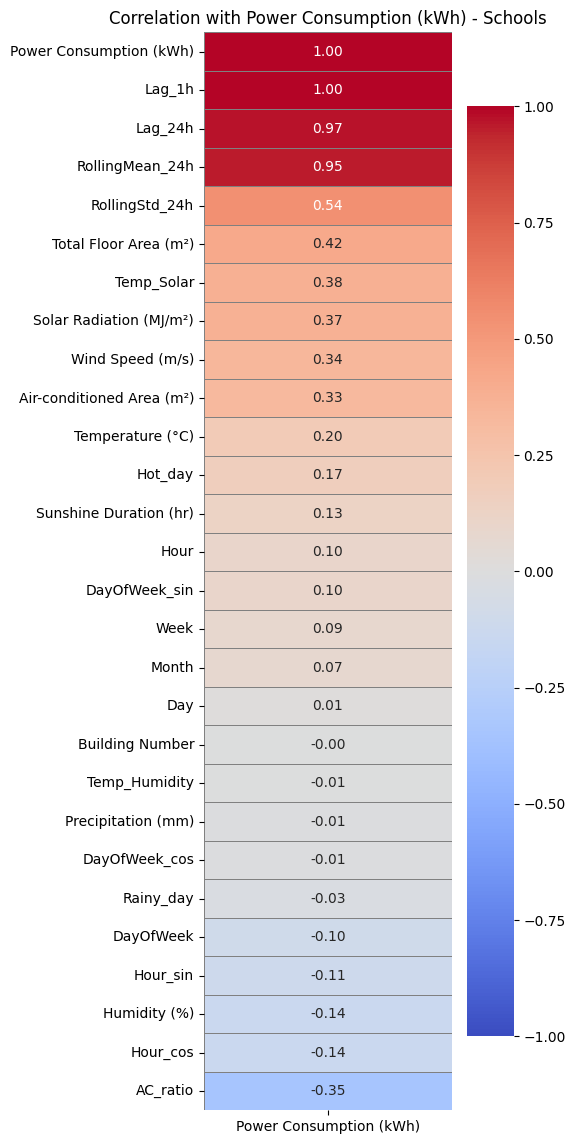

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (numeric only)
corr_matrix = train_school.corr(numeric_only=True)

# Select the row of correlations with 'Power Consumption (kWh)'
corr_with_power = corr_matrix[['Power Consumption (kWh)']].sort_values(by='Power Consumption (kWh)', ascending=False)

plt.figure(figsize=(4, len(corr_with_power)*0.5))  # Adjust height to number of features

sns.heatmap(
    corr_with_power,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    fmt=".2f"
)

plt.title('Correlation with Power Consumption (kWh) - Schools')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: pick one building number
building_number = 5  # replace with your building number

# Filter data for that building
df_building = train_school[train_school['Building Number'] == building_number].copy()

# Convert datetime to pandas datetime type
df_building['Datetime'] = pd.to_datetime(df_building['Datetime'])

# Extract date and hour separately
df_building['Date'] = df_building['Datetime'].dt.date
df_building['Hour'] = df_building['Datetime'].dt.hour

# Loop through each date and plot power consumption over hours
for date, group in df_building.groupby('Date'):
    hourly_consumption = group.sort_values('Hour').set_index('Hour')['Power Consumption (kWh)']
    
    plt.figure(figsize=(10, 4))
    plt.plot(hourly_consumption.index, hourly_consumption.values, marker='o')
    plt.title(f'Power Consumption on {date} - Building {building_number}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Power Consumption (kWh)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2223
[LightGBM] [Info] Number of data points in the train set: 18360, number of used features: 19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3457.795634
LightGBM MSE: 36430.60
LightGBM RMSE: 190.87
LightGBM R2: 0.9952
LightGBM MAPE: 2.75%


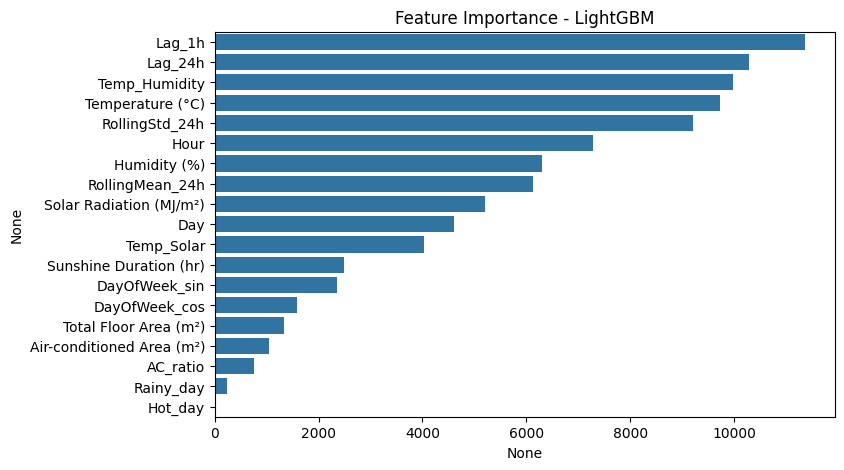

In [15]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # ===== Prepare features & target =====
# X = bld_cons_hotel[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)']]  # Add more features if available
# y = bld_cons_hotel['Power Consumption (kWh)']



# # ===== Train-test split =====
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ===== LightGBM model =====
# model = lgb.LGBMRegressor(
#     boosting_type='gbdt',
#     n_estimators=1000,
#     learning_rate=0.08,
#     num_leaves=31,
#     random_state=42
# )

# from lightgbm import early_stopping

# model.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     eval_metric='rmse',
#     callbacks=[early_stopping(stopping_rounds=50)]
# )


# # ===== Predictions =====
# y_pred = model.predict(X_test)

# # ===== Metrics =====
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"LightGBM MSE: {mse}")
# print(f"LightGBM RMSE: {np.sqrt(mse)}")
# print(f"LightGBM R2: {r2}")

# # ===== Feature importance =====
# import matplotlib.pyplot as plt
# import seaborn as sns

# feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# plt.figure(figsize=(8, 5))
# sns.barplot(x=feat_imp, y=feat_imp.index)
# plt.title("Feature Importance - LightGBM")
# plt.show()

# ['num_date_time', 'Building Number', 'Datetime', 'Temperature (°C)',
#        'Precipitation (mm)', 'Wind Speed (m/s)', 'Humidity (%)',
#        'Sunshine Duration (hr)', 'Solar Radiation (MJ/m²)',
#        'Power Consumption (kWh)', 'Hour', 'Day', 'Month', 'DayOfWeek', 'Week',
#        'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Lag_1h',
#        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
#        'Temp_Solar', 'Hot_day', 'Rainy_day', 'Air-conditioned Area (m²)_x',
#        'Total Floor Area (m²)_x', 'AC_ratio', 'Air-conditioned Area (m²)_y',
#        'Total Floor Area (m²)_y', 'Building Type_x',
#        'Air-conditioned Area (m²)', 'Total Floor Area (m²)',
#        'Building Type_y'],
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_school[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity', 'Hot_day', 'Rainy_day', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Sunshine Duration (hr)', 'Solar Radiation (MJ/m²)',
        'Temp_Solar','AC_ratio']]  # Add more features if available
y = train_school['Power Consumption (kWh)']

# ===== Train-test split =====    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()


In [63]:
# test_school = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type']],
#     on='Building Number',
#     how='left'
# )
test_school = test[test['Building Type'] == 'School']

test_school.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),...,is_weekend,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Temp_Humidity,Temp_Solar,Hot_day,Rainy_day,AC_ratio
672,5_20240825 00,5,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,403749.39,...,1,0.000000,1.000000,-0.781831,0.62349,2120.0,0,0,0,0.615498
673,5_20240825 01,5,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,403749.39,...,1,0.258819,0.965926,-0.781831,0.62349,2088.0,0,0,0,0.615498
674,5_20240825 02,5,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,403749.39,...,1,0.500000,0.866025,-0.781831,0.62349,2149.7,0,0,0,0.615498
675,5_20240825 03,5,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,403749.39,...,1,0.707107,0.707107,-0.781831,0.62349,2133.1,0,0,0,0.615498
676,5_20240825 04,5,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,403749.39,...,1,0.866025,0.500000,-0.781831,0.62349,2193.0,0,0,0,0.615498


In [55]:
import pandas as pd
import numpy as np

# Ensure datetime is in proper format
test['Datetime'] = pd.to_datetime(test['Datetime'])

# ------------------ Time-based features ------------------
test['Month'] = test['Datetime'].dt.month
test['DayOfWeek'] = test['Datetime'].dt.weekday  # 0=Monday, 6=Sunday
test['Week'] = test['Datetime'].dt.isocalendar().week

# is_weekend
test['is_weekend'] = (test['DayOfWeek'] >= 5).astype(int)

# Cyclic encoding for hour and day of week
test['Hour_sin'] = np.sin(2 * np.pi * test['Hour']/24)
test['Hour_cos'] = np.cos(2 * np.pi * test['Hour']/24)
test['DayOfWeek_sin'] = np.sin(2 * np.pi * test['DayOfWeek']/7)
test['DayOfWeek_cos'] = np.cos(2 * np.pi * test['DayOfWeek']/7)

# ------------------ Weather interaction features ------------------
test['Temp_Humidity'] = test['Temperature (°C)'] * test['Humidity (%)']
test['Temp_Solar'] = 0  # No solar radiation in test? (Fill if available)

# Optional categorical weather flags
test['Hot_day'] = (test['Temperature (°C)'] > 30).astype(int)
test['Rainy_day'] = (test['Precipitation (mm)'] > 0).astype(int)

# ------------------ Building features ------------------
# AC ratio
test['AC_ratio'] = test['Air-conditioned Area (m²)'] / test['Total Floor Area (m²)']

# One-hot encoding for building type
# test = pd.get_dummies(test, columns=['Building Type'])

# ------------------ Match train columns ------------------
# Ensure test dataset has same columns as train dataset (except target)
# for col in train.columns:
#     if col not in test.columns and col != 'Power Consumption (kWh)':
#         test[col] = 0  # Fill missing columns with 0 for compatibility

# # Reorder columns to match train
# test = test[[c for c in train.columns if c != 'Power Consumption (kWh)']]


In [ ]:
# test = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type']],
#     on='Building Number',
#     how='left'  
# )
test.head()


,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),...,is_weekend,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos,Temp_Humidity,Temp_Solar,Hot_day,Rainy_day,AC_ratio
0,1_20240825 00,1,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,82912.71,...,1,0.000000,1.000000,-0.781831,0.62349,2120.0,0,0,0,0.935755
1,1_20240825 01,1,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,82912.71,...,1,0.258819,0.965926,-0.781831,0.62349,2088.0,0,0,0,0.935755
2,1_20240825 02,1,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,82912.71,...,1,0.500000,0.866025,-0.781831,0.62349,2149.7,0,0,0,0.935755
3,1_20240825 03,1,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,82912.71,...,1,0.707107,0.707107,-0.781831,0.62349,2133.1,0,0,0,0.935755
4,1_20240825 04,1,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,82912.71,...,1,0.866025,0.500000,-0.781831,0.62349,2193.0,0,0,0,0.935755


In [58]:
test.columns

Index(['num_date_time', 'Building Number', 'Datetime', 'Temperature (°C)',
       'Precipitation (mm)', 'Wind Speed (m/s)', 'Humidity (%)', 'Hour', 'Day',
       'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type',
       'Month', 'DayOfWeek', 'Week', 'is_weekend', 'Hour_sin', 'Hour_cos',
       'DayOfWeek_sin', 'DayOfWeek_cos', 'Temp_Humidity', 'Temp_Solar',
       'Hot_day', 'Rainy_day', 'AC_ratio'],
      dtype='object')

In [64]:
import pandas as pd


# # Convert to datetime first
# test_school['Datetime'] = pd.to_datetime(test_school['Datetime'], format='%Y%m%d %H')

# # Now extract the hour
# test_school['Hour'] = test_school['Datetime'].dt.hour
# test_school['Day'] = test_school['Datetime'].dt.day



# Features for prediction — must match training features
X_future = test_school[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]

# Predict
test_school['Predicted Power Consumption (kWh)'] = model.predict(X_future)

# Save predictions
test_school.to_csv("school_predictions.csv", index=False)


KeyError: "['Lag_1h', 'Lag_24h', 'RollingMean_24h', 'RollingStd_24h'] not in index"

In [24]:
df_new = pd.read_csv("school_predictions.csv")

In [25]:
df_new.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,5_20240825 00,5,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,403749.39,248507.0,School,4203.927384
1,5_20240825 01,5,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,403749.39,248507.0,School,4096.180088
2,5_20240825 02,5,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,403749.39,248507.0,School,3985.458758
3,5_20240825 03,5,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,403749.39,248507.0,School,3788.571248
4,5_20240825 04,5,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,403749.39,248507.0,School,3781.303657


In [59]:
# train_com = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_com = train[train['Building Type_x'] == 'Commercial']

# train_hospital = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_hospital = train[train['Building Type_x'] == 'Hospital']

# train_other = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_other = train[train['Building Type_x'] == 'Other Building']

# train_apartment = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_apartment = train[train['Building Type_x'] == 'Apartment']

# train_research = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_research = train[train['Building Type_x'] == 'Research Institute']

# train_department = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_department = train[train['Building Type_x'] == 'Department Store']

# train_idc = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_idc = train[train['Building Type_x'] == 'IDC (Telecom Center)']

# train_public = train.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type_x']],
#     on='Building Number',
#     how='left'
# )
train_public = train[train['Building Type_x'] == 'Public Facility']

# test_com = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_com = test[test['Building Type'] == 'Commercial']

# test_hospital = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_hospital = test[test['Building Type'] == 'Hospital']

# test_other = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_other = test[test['Building Type'] == 'Other Building']

# test_apartment = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_apartment = test[test['Building Type'] == 'Apartment']

# test_research = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_research = test[test['Building Type'] == 'Research Institute']

# test_department = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_department = test[test['Building Type'] == 'Department Store']

# test_idc = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_idc = test[test['Building Type'] == 'IDC (Telecom Center)']

# test_public = test.merge(
#     bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type_x']],
#     on='Building Number',
#     how='left'
# )
test_public = test[test['Building Type'] == 'Public Facility']


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1929
[LightGBM] [Info] Number of data points in the train set: 18360, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2511.983457
LightGBM MSE: 11317.18
LightGBM RMSE: 106.38
LightGBM R2: 0.9946
LightGBM MAPE: 2.46%


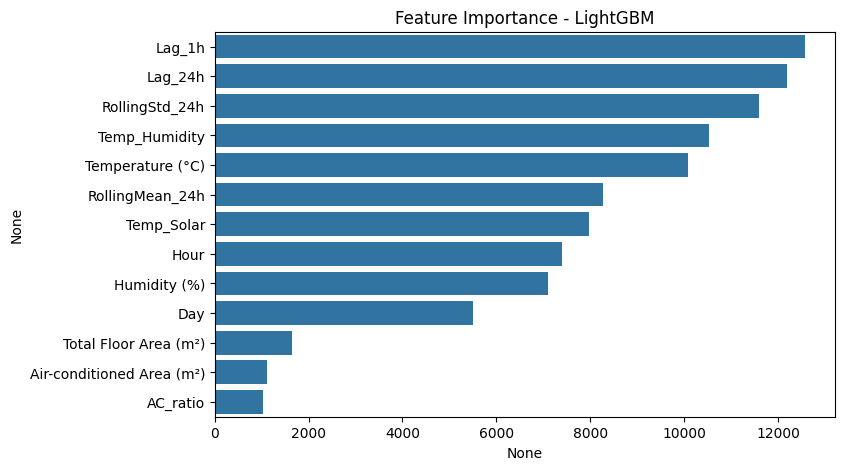

In [41]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_com[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]  # Add more features if available
y = train_com['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_com = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=98,
    random_state=42
)

# Train (no 'verbose' here)
model_com.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_com.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_com.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()


In [38]:
import pandas as pd


# Convert to datetime first
test_com['D'] = pd.to_datetime(test_com['Datetime'], format='%Y%m%d %H')

# Now extract the hour
test_com['Hour'] = test_com['Datetime'].dt.hour
test_com['Day'] = test_com['Datetime'].dt.day



# Features for prediction — must match training features
X_future = test_com[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_com['Predicted Power Consumption (kWh)'] = model_com.predict(X_future)

# Save predictions
test_com.to_csv("commercial_predictions.csv", index=False)
df_new_com = pd.read_csv("commercial_predictions.csv")

df_new_com.head()


,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,D,Predicted Power Consumption (kWh)
0,2_20240825 00,2,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,40658.9,30392.82,Commercial,2024-08-25 00:00:00,1615.915157
1,2_20240825 01,2,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,40658.9,30392.82,Commercial,2024-08-25 01:00:00,1336.964417
2,2_20240825 02,2,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,40658.9,30392.82,Commercial,2024-08-25 02:00:00,1367.912648
3,2_20240825 03,2,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,40658.9,30392.82,Commercial,2024-08-25 03:00:00,1361.991338
4,2_20240825 04,2,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,40658.9,30392.82,Commercial,2024-08-25 04:00:00,1288.298956


XGBoost MSE: 53846.33
XGBoost RMSE: 232.05
XGBoost R2: 0.9976
XGBoost MAPE: 31244694499790248.00%


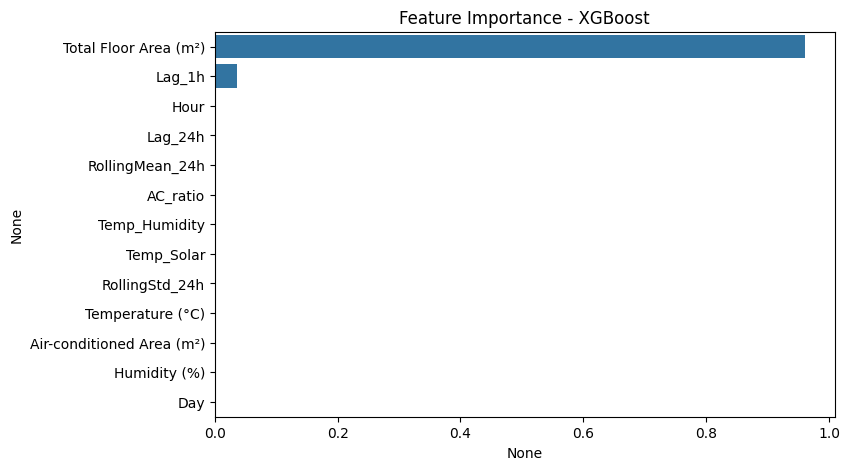

LightGBM Safe MAPE: 2.52%


In [42]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===== Prepare features & target =====
X = train_hospital[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']] # Add more features if available
y = train_hospital['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== XGBoost Regression model =====
xgb_model = XGBRegressor(
    n_estimators=1500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ===== Predictions =====
y_pred = xgb_model.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"XGBoost MSE: {mse:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R2: {r2:.4f}")
print(f"XGBoost MAPE: {mape:.2f}%")

# ===== Feature importance =====
feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - XGBoost")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


In [41]:
# Features for prediction — must match training features
X_future = test_hospital[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_hospital['Predicted Power Consumption (kWh)'] = xgb_model.predict(X_future)

# Save predictions
test_hospital.to_csv("hospital_predictions.csv", index=False)
df_new_hospital = pd.read_csv("hospital_predictions.csv")

df_new_hospital.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,3_20240825 00,3,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,560431.0,418992.0,Hospital,15350.466
1,3_20240825 01,3,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,560431.0,418992.0,Hospital,15367.079
2,3_20240825 02,3,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,560431.0,418992.0,Hospital,15517.704
3,3_20240825 03,3,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,560431.0,418992.0,Hospital,14854.399
4,3_20240825 04,3,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,560431.0,418992.0,Hospital,15363.323


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1926
[LightGBM] [Info] Number of data points in the train set: 18360, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2290.240326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

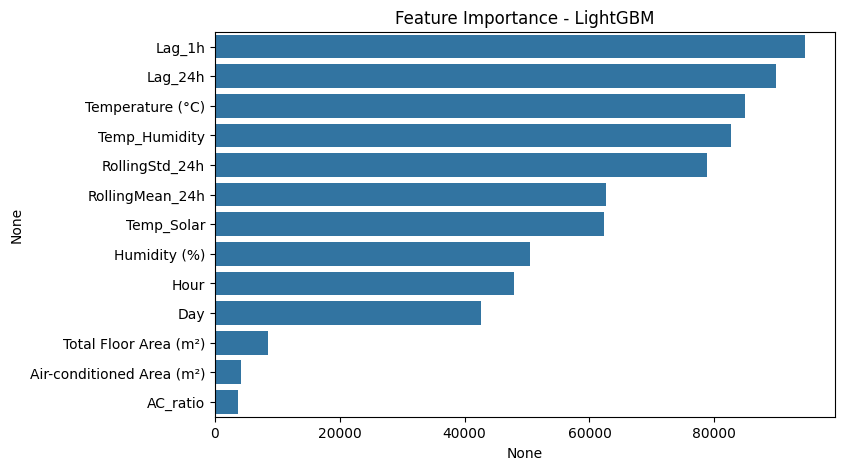

In [43]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_other[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']] # Add more features if available
y = train_other['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_other = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=1000,
    random_state=42
)

# Train (no 'verbose' here)
model_other.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_other.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_other.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()


In [ ]:
# Features for prediction — must match training features
X_future = test_other[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_other['Predicted Power Consumption (kWh)'] = rf_model.predict(X_future)

# Save predictions
test_other.to_csv("other_predictions.csv", index=False)
df_new_other = pd.read_csv("other_predictions.csv")

df_new_other.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,7_20240825 00,7,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,118346.0,78237.38,Other Building,1936.651775
1,7_20240825 01,7,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,118346.0,78237.38,Other Building,2642.394643
2,7_20240825 02,7,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,118346.0,78237.38,Other Building,3060.331503
3,7_20240825 03,7,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,118346.0,78237.38,Other Building,2913.847692
4,7_20240825 04,7,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,118346.0,78237.38,Other Building,2616.896123


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Safe MAPE function =====
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

# ===== Loop through each building =====
results = []

for b_num in train_other['Building Number'].unique():
    print(f"\n=== Training for Building {b_num} ===")
    
    # Filter dataset for the building
    df_b = train_other[train_other['Building Number'] == b_num]
    
    # Features & target
    X = df_b[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]
    y = df_b['Power Consumption (kWh)']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Model
    model = lgb.LGBMRegressor(
        boosting_type='gbdt',
        n_estimators=1500,
        learning_rate=0.1,
        num_leaves=150,
        random_state=42
    )
    
    # Train
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = safe_mape(y_test, y_pred)
    
    results.append({
        'Building Number': b_num,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Safe MAPE (%)': mape
    })
    
    # Feature importance plot
    feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feat_imp, y=feat_imp.index)
    plt.title(f"Feature Importance - Building {b_num}")
    plt.show()

# ===== Results table =====
results_df = pd.DataFrame(results)
print("\nFinal results per building:")
print(results_df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Building 7
b7 = train_other[train_other['Building Number'] == 7]

# Get unique days
days = sorted(b7['Day'].unique())

# Plot each day separately
for day in days:
    daily_data = b7[b7['Day'] == day]
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=daily_data, x='Hour', y='Power Consumption (kWh)', marker='o')
    plt.title(f"Building 7 - Power Consumption (Day {day})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Power Consumption (kWh)")
    plt.grid(True)
    plt.show()


In [83]:
train_other.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Sunshine Duration (hr),Solar Radiation (MJ/m²),Power Consumption (kWh),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type
12240,7_20240601 00,7,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.0,3776.71,0,1,118346.0,78237.38,Other Building
12241,7_20240601 01,7,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.0,4467.69,1,1,118346.0,78237.38,Other Building
12242,7_20240601 02,7,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.0,4325.85,2,1,118346.0,78237.38,Other Building
12243,7_20240601 03,7,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.0,4394.29,3,1,118346.0,78237.38,Other Building
12244,7_20240601 04,7,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.0,4304.67,4,1,118346.0,78237.38,Other Building


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # in percentage

print(f"Random Forest RMSE: {rmse:.4f}")
print(f"Random Forest R²: {r2:.4f}")
print(f"Random Forest MAPE: {mape:.2f}%")

Random Forest RMSE: 139.5389
Random Forest R²: 0.7567
Random Forest MAPE: 3365148453284033024.00%


In [54]:
# Features for prediction — must match training features
X_future = test_other[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_other['Predicted Power Consumption (kWh)'] = rf_model.predict(X_future)

# Save predictions
test_other.to_csv("other_predictions.csv", index=False)
df_new_other = pd.read_csv("other_predictions.csv")

df_new_other.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,7_20240825 00,7,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,118346.0,78237.38,Other Building,2365.61340
1,7_20240825 01,7,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,118346.0,78237.38,Other Building,2720.10541
2,7_20240825 02,7,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,118346.0,78237.38,Other Building,2893.90835
3,7_20240825 03,7,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,118346.0,78237.38,Other Building,2962.67733
4,7_20240825 04,7,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,118346.0,78237.38,Other Building,2867.00341


In [173]:
train_department['Building Number'].unique()

array([18, 19, 27, 29, 32, 34, 40, 45, 54, 59, 63, 73, 74, 79, 88, 95])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 16524, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1108.301051
LightGBM MSE: 4292.07
LightGBM RMSE: 65.51
LightGBM R2: 0.9941
LightGBM MAPE: 431561752747100416.00%


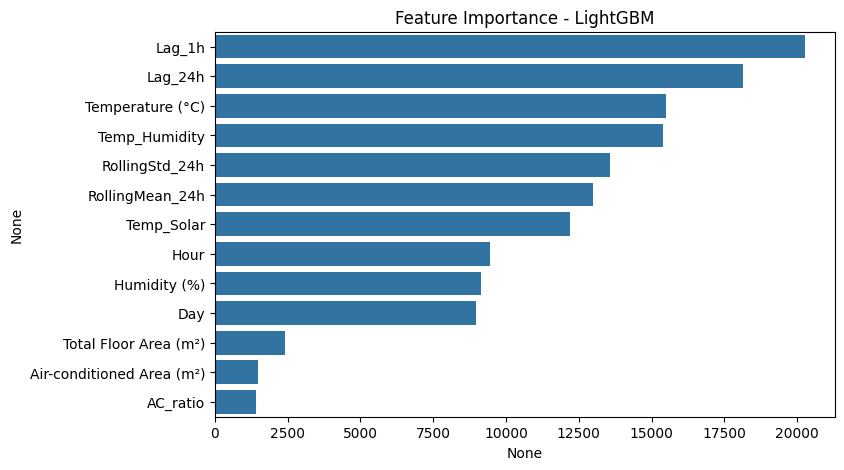

LightGBM Safe MAPE: 5.24%


In [46]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_apartment[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']] # Add more features if available
y = train_apartment['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_ap = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1500,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model_ap.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_ap.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_ap.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


Random Forest MSE: 5312.33
Random Forest RMSE: 72.89
Random Forest R2: 0.9927
Random Forest Safe MAPE: 4.08%


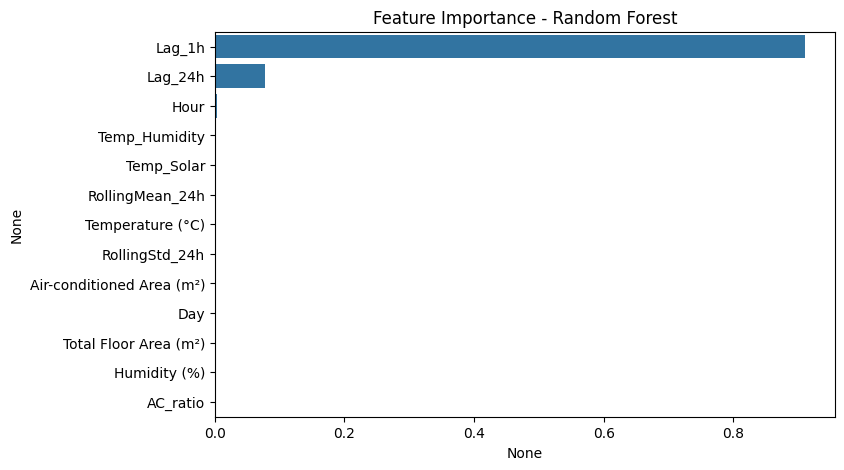

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Prepare features & target =====
X = train_apartment[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]
y = train_apartment['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== Random Forest model =====
rf_model_ap = RandomForestRegressor(
    n_estimators=500,        # number of trees
    max_depth=None,          # no max depth
    min_samples_split=2,     # minimum samples to split
    min_samples_leaf=1,      # minimum samples at leaf
    random_state=42,
    n_jobs=-1
)

# Train
rf_model_ap.fit(X_train, y_train)

# ===== Predictions =====
y_pred = rf_model_ap.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Safe MAPE function
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R2: {r2:.4f}")
print(f"Random Forest Safe MAPE: {mape:.2f}%")

# ===== Feature importance =====
feat_imp = pd.Series(rf_model_ap.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()


In [62]:
# Features for prediction — must match training features
X_future = test_apartment[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_apartment['Predicted Power Consumption (kWh)'] = rf_model_ap.predict(X_future)

# Save predictions
test_apartment.to_csv("apartment_predictions.csv", index=False)
df_new_apartment = pd.read_csv("apartment_predictions.csv")

df_new_apartment.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,11_20240825 00,11,2024-08-25 00:00:00,26.3,0.0,0.4,88.0,0,25,271233.0,233263.0,Apartment,1411.37592
1,11_20240825 01,11,2024-08-25 01:00:00,25.9,0.0,0.2,89.0,1,25,271233.0,233263.0,Apartment,1116.55176
2,11_20240825 02,11,2024-08-25 02:00:00,25.7,0.0,0.8,91.0,2,25,271233.0,233263.0,Apartment,976.33392
3,11_20240825 03,11,2024-08-25 03:00:00,25.3,0.0,0.4,92.0,3,25,271233.0,233263.0,Apartment,846.75612
4,11_20240825 04,11,2024-08-25 04:00:00,25.1,0.0,0.8,93.0,4,25,271233.0,233263.0,Apartment,799.04112


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1924
[LightGBM] [Info] Number of data points in the train set: 16524, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2108.993719
LightGBM MSE: 43533.80
LightGBM RMSE: 208.65
LightGBM R2: 0.9546
LightGBM MAPE: 4.02%


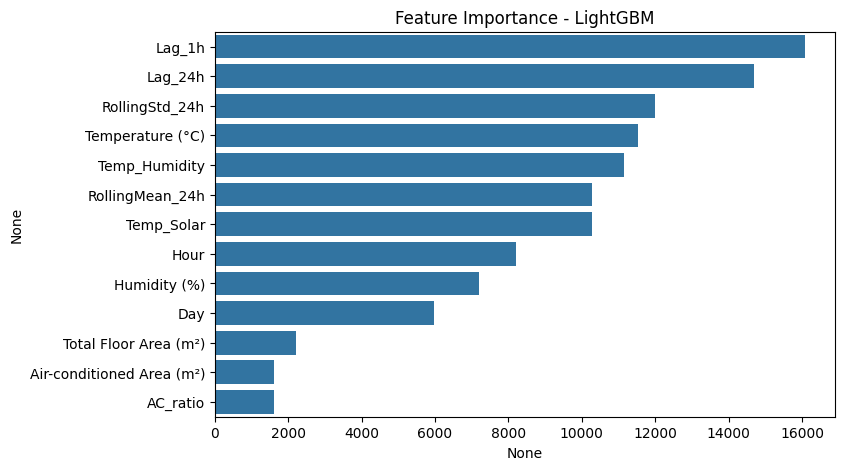

In [48]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_research[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]
y = train_research['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_r = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1200,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model_r.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_r.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_r.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()


In [64]:
# Features for prediction — must match training features
X_future = test_research[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_research['Predicted Power Consumption (kWh)'] = model_r.predict(X_future)

# Save predictions
test_research.to_csv("research_predictions.csv", index=False)
df_new_research = pd.read_csv("research_predictions.csv")

df_new_research.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,13_20240825 00,13,2024-08-25 00:00:00,26.3,0.0,0.4,88.0,0,25,97372.12,44536.0,Research Institute,2621.220439
1,13_20240825 01,13,2024-08-25 01:00:00,25.9,0.0,0.2,89.0,1,25,97372.12,44536.0,Research Institute,2585.049057
2,13_20240825 02,13,2024-08-25 02:00:00,25.7,0.0,0.8,91.0,2,25,97372.12,44536.0,Research Institute,2551.076179
3,13_20240825 03,13,2024-08-25 03:00:00,25.3,0.0,0.4,92.0,3,25,97372.12,44536.0,Research Institute,2542.771612
4,13_20240825 04,13,2024-08-25 04:00:00,25.1,0.0,0.8,93.0,4,25,97372.12,44536.0,Research Institute,2121.022291


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1952
[LightGBM] [Info] Number of data points in the train set: 29376, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2732.616053
LightGBM MSE: 31079.51
LightGBM RMSE: 176.29
LightGBM R2: 0.9966
LightGBM MAPE: 76078281148838032.00%


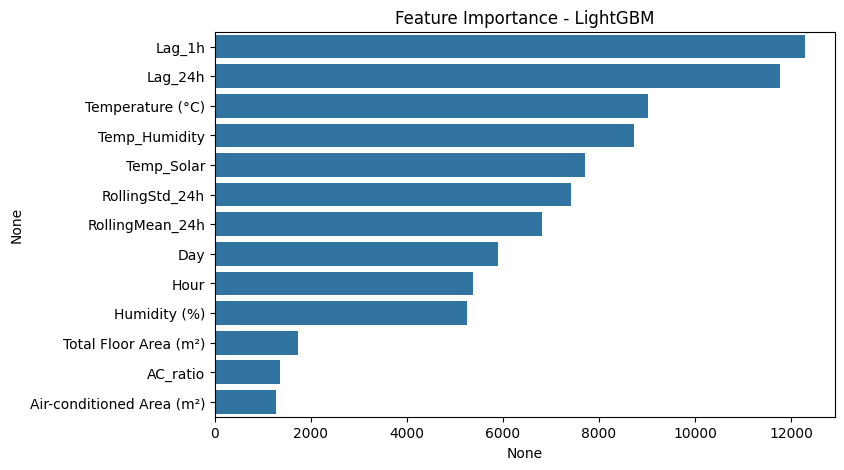

LightGBM Safe MAPE: 5.30%


In [49]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_department[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]
y = train_department['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_dep = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=900,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model_dep.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_dep.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_dep.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ===== Safe MAPE function =====
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== Model =====
rf_model_dep = RandomForestRegressor(
    n_estimators=1500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# ===== Train =====
rf_model_dep.fit(X_train, y_train)

# ===== Predict =====
y_pred = rf_model_dep.predict(X_test)

# ===== Metrics =====
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = safe_mape(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.4f}")
print(f"Random Forest R²: {r2:.4f}")
print(f"Random Forest Safe MAPE: {mape:.2f}%")


Random Forest RMSE: 210.6005
Random Forest R²: 0.9951
Random Forest Safe MAPE: 5.37%


In [70]:
# Features for prediction — must match training features
X_future = test_department[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_department['Predicted Power Consumption (kWh)'] = rf_model_dep.predict(X_future)

# Save predictions
test_department.to_csv("dept_predictions.csv", index=False)
df_new_dept = pd.read_csv("dept_predictions.csv")

df_new_dept.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,18_20240825 00,18,2024-08-25 00:00:00,25.0,0.0,0.2,90.0,0,25,51123.0,21751.0,Department Store,557.57144
1,18_20240825 01,18,2024-08-25 01:00:00,24.7,0.0,1.0,92.0,1,25,51123.0,21751.0,Department Store,544.92640
2,18_20240825 02,18,2024-08-25 02:00:00,24.3,0.0,0.9,94.0,2,25,51123.0,21751.0,Department Store,529.24764
3,18_20240825 03,18,2024-08-25 03:00:00,24.2,0.0,0.6,94.0,3,25,51123.0,21751.0,Department Store,521.49832
4,18_20240825 04,18,2024-08-25 04:00:00,23.9,0.0,0.7,95.0,4,25,51123.0,21751.0,Department Store,536.13664


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 16524, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10318.715113
LightGBM MSE: 32830.59
LightGBM RMSE: 181.19
LightGBM R2: 0.9985
LightGBM MAPE: 0.91%


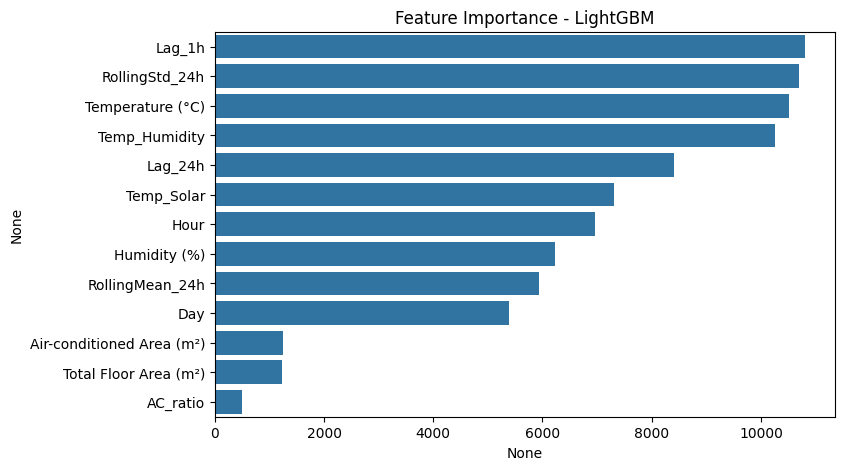

LightGBM Safe MAPE: 0.91%


In [51]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_idc[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]  # Add more features if available
y = train_idc['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_idc = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=900,
    learning_rate=0.1,
    num_leaves=96,
    random_state=42
)

# Train (no 'verbose' here)
model_idc.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_idc.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_idc.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


In [72]:
# Features for prediction — must match training features
X_future = test_idc[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_idc['Predicted Power Consumption (kWh)'] = model_idc.predict(X_future)

# Save predictions
test_idc.to_csv("idc_predictions.csv", index=False)
df_new_idc = pd.read_csv("idc_predictions.csv")

df_new_idc.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,30_20240825 00,30,2024-08-25 00:00:00,25.0,0.0,0.2,90.0,0,25,31156.75,13487.0,IDC (Telecom Center),9651.713712
1,30_20240825 01,30,2024-08-25 01:00:00,24.7,0.0,1.0,92.0,1,25,31156.75,13487.0,IDC (Telecom Center),9651.307285
2,30_20240825 02,30,2024-08-25 02:00:00,24.3,0.0,0.9,94.0,2,25,31156.75,13487.0,IDC (Telecom Center),9689.968833
3,30_20240825 03,30,2024-08-25 03:00:00,24.2,0.0,0.6,94.0,3,25,31156.75,13487.0,IDC (Telecom Center),9677.496998
4,30_20240825 04,30,2024-08-25 04:00:00,23.9,0.0,0.7,95.0,4,25,31156.75,13487.0,IDC (Telecom Center),9657.634370


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1911
[LightGBM] [Info] Number of data points in the train set: 14688, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1626.331272
LightGBM MSE: 20861.12
LightGBM RMSE: 144.43
LightGBM R2: 0.9635
LightGBM MAPE: 5.64%


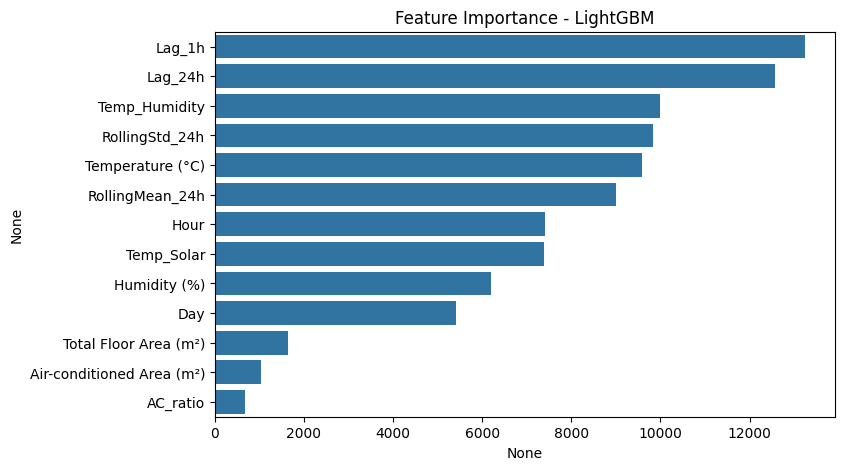

LightGBM Safe MAPE: 5.64%


In [52]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_public[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']]
y = train_public['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_p = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model_p.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_p.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_p.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


In [74]:
# Features for prediction — must match training features
X_future = test_public[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_public['Predicted Power Consumption (kWh)'] = model_p.predict(X_future)

# Save predictions
test_public.to_csv("public_predictions.csv", index=False)
df_new_public = pd.read_csv("public_predictions.csv")

df_new_public.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,33_20240825 00,33,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,138156.0,88119.0,Public Facility,1514.508156
1,33_20240825 01,33,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,138156.0,88119.0,Public Facility,1416.307355
2,33_20240825 02,33,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,138156.0,88119.0,Public Facility,1302.426966
3,33_20240825 03,33,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,138156.0,88119.0,Public Facility,1315.627632
4,33_20240825 04,33,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,138156.0,88119.0,Public Facility,1748.408783


In [237]:
bld['Building Type'].unique()

array(['Hotel', 'Commercial', 'Hospital', 'School', 'Other Building',
       'Apartment', 'Research Institute', 'Department Store',
       'IDC (Telecom Center)', 'Public Facility'], dtype=object)

In [75]:
train_hotel = train.merge(
    bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Building Type']],
    on='Building Number',
    how='left'
)
train_hotel = train_hotel[train_hotel['Building Type'] == 'Hotel']

In [76]:
train_hotel.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Sunshine Duration (hr),Solar Radiation (MJ/m²),Power Consumption (kWh),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80,0,1,82912.71,77586.0,Hotel
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.0,5591.85,1,1,82912.71,77586.0,Hotel
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.0,5338.17,2,1,82912.71,77586.0,Hotel
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.0,4554.42,3,1,82912.71,77586.0,Hotel
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.0,3602.25,4,1,82912.71,77586.0,Hotel


In [53]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# ===== Prepare features & target =====
X = train_hotel[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)','Lag_1h',
        'Lag_24h', 'RollingMean_24h', 'RollingStd_24h', 'Temp_Humidity',
        'Temp_Solar','AC_ratio']] # Add more features if available
y = train_hotel['Power Consumption (kWh)']

# ===== Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ===== LightGBM model =====
model_hotel = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=1500,
    learning_rate=0.1,
    num_leaves=95,
    random_state=42
)

# Train (no 'verbose' here)
model_hotel.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# ===== Predictions =====
y_pred = model_hotel.predict(X_test)

# ===== Metrics =====
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # %

print(f"LightGBM MSE: {mse:.2f}")
print(f"LightGBM RMSE: {rmse:.2f}")
print(f"LightGBM R2: {r2:.4f}")
print(f"LightGBM MAPE: {mape:.2f}%")

# ===== Feature importance =====
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model_hotel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - LightGBM")
plt.show()
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

mape = safe_mape(y_test, y_pred)
print(f"LightGBM Safe MAPE: {mape:.2f}%")


NameError: name 'train_hotel' is not defined

In [78]:
test_hotel = test.merge(
    bld[['Building Number', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)','Building Type']],
    on='Building Number',
    how='left'
)
test_hotel = test_hotel[test_hotel['Building Type'] == 'Hotel']

In [79]:
# Features for prediction — must match training features
X_future = test_hotel[['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Hour', 'Day', 'Temperature (°C)', 'Humidity (%)']]

# Predict
test_hotel['Predicted Power Consumption (kWh)'] = model_hotel.predict(X_future)

# Save predictions
test_hotel.to_csv("hotel_predictions.csv", index=False)
df_new_hotel = pd.read_csv("hotel_predictions.csv")

df_new_hotel.head()

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,1_20240825 00,1,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,82912.71,77586.0,Hotel,5018.480879
1,1_20240825 01,1,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,82912.71,77586.0,Hotel,4937.487247
2,1_20240825 02,1,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,82912.71,77586.0,Hotel,3924.108348
3,1_20240825 03,1,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,82912.71,77586.0,Hotel,3625.883917
4,1_20240825 04,1,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,82912.71,77586.0,Hotel,3550.905603


In [266]:
smp.head()

,num_date_time,answer
0,1_20240825 00,0
1,1_20240825 01,0
2,1_20240825 02,0
3,1_20240825 03,0
4,1_20240825 04,0


In [267]:
df = pd.read_csv("hotel_predictions.csv")

In [268]:
df

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,Predicted Power Consumption (kWh)
0,1_20240825 00,1,2024-08-25 00:00:00,26.5,0.0,0.7,80.0,0,25,82912.71,77586.0,Hotel,4769.092667
1,1_20240825 01,1,2024-08-25 01:00:00,26.1,0.0,0.0,80.0,1,25,82912.71,77586.0,Hotel,4735.601024
2,1_20240825 02,1,2024-08-25 02:00:00,25.9,0.0,0.3,83.0,2,25,82912.71,77586.0,Hotel,4028.864472
3,1_20240825 03,1,2024-08-25 03:00:00,25.7,0.0,1.1,83.0,3,25,82912.71,77586.0,Hotel,3759.789135
4,1_20240825 04,1,2024-08-25 04:00:00,25.5,0.0,1.0,86.0,4,25,82912.71,77586.0,Hotel,3760.310257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,100_20240831 19,100,2024-08-31 19:00:00,27.1,0.0,2.7,68.0,19,31,162070.24,152943.0,Hotel,2033.362998
1676,100_20240831 20,100,2024-08-31 20:00:00,26.5,0.0,2.9,73.0,20,31,162070.24,152943.0,Hotel,1967.841437
1677,100_20240831 21,100,2024-08-31 21:00:00,26.3,0.0,3.5,73.0,21,31,162070.24,152943.0,Hotel,2010.441887
1678,100_20240831 22,100,2024-08-31 22:00:00,26.0,0.0,3.4,68.0,22,31,162070.24,152943.0,Hotel,2167.714291


In [80]:
import pandas as pd

# Load your submission once
submission_df = pd.read_csv('sample_submission.csv')

def update_submission_with_test(submission_df, test_file_path, power_col_name='Predicted Power Consumption (kWh)'):
    # Load the current test file
    test_df = pd.read_csv(test_file_path)
    
    # Create a dict mapping from num_date_time to power consumption
    update_map = dict(zip(test_df['num_date_time'], test_df[power_col_name]))
    
    # Update submission_df answer only for matching num_date_time keys
    submission_df['answer'] = submission_df.apply(
        lambda row: update_map.get(row['num_date_time'], row['answer']),
        axis=1
    )
    return submission_df

# Example of updating submission incrementally:
test_files = ['hotel_predictions.csv', 'apartment_predictions.csv', 'commercial_predictions.csv', 'dept_predictions.csv',
              'hospital_predictions.csv', 'idc_predictions.csv', 'other_predictions.csv', 'public_predictions.csv',
              'research_predictions.csv', 'school_predictions.csv']  

for test_file in test_files:
    submission_df = update_submission_with_test(submission_df, test_file)

# Save the final updated submission
submission_df.to_csv('updated_submission.csv', index=False)


In [282]:
from prophet import Prophet
import pandas as pd

# Rename target column if needed
train_hotel['y'] = train_hotel['Power Consumption (kWh)']

# Prepare DataFrame for Prophet with regressors
prophet_df = train_hotel[['ds', 'y', 'Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Temperature (°C)', 'Humidity (%)']]

# Initialize Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

# Add regressors one by one
model.add_regressor('Total Floor Area (m²)')
model.add_regressor('Air-conditioned Area (m²)')
model.add_regressor('Temperature (°C)')
model.add_regressor('Humidity (%)')

# Fit the model
model.fit(prophet_df)

# Create future dataframe with the same regressors
future = model.make_future_dataframe(periods=168, freq='H')

# Now add regressors for the future dataframe
future['Total Floor Area (m²)'] = train_hotel['Total Floor Area (m²)'].mean()
future['Air-conditioned Area (m²)'] = train_hotel['Air-conditioned Area (m²)'].mean()
future['Temperature (°C)'] = train_hotel['Temperature (°C)'].mean()  # Replace with forecasted values if available
future['Humidity (%)'] = train_hotel['Humidity (%)'].mean()         # Replace with forecasted values if available

# Make predictions
forecast = model.predict(future)

# Extract only future predictions (after the last training date)
last_train_date = prophet_df['ds'].max()
future_forecast = forecast[forecast['ds'] > last_train_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Save predictions to CSV
future_forecast.to_csv('power_consumption_forecast_next_week.csv', index=False)

print("Saved forecast for next 7 days to 'power_consumption_forecast_next_week.csv'")
print(future_forecast.head())


16:51:52 - cmdstanpy - INFO - Chain [1] start processing
16:51:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for next 7 days to 'power_consumption_forecast_next_week.csv'
                      ds         yhat  yhat_lower   yhat_upper
2040 2024-08-25 00:00:00  3188.233602  898.566216  5447.631865
2041 2024-08-25 01:00:00  3060.409876  868.699272  5236.576192
2042 2024-08-25 02:00:00  2928.438659  632.389002  5237.919231
2043 2024-08-25 03:00:00  2835.363146  592.080110  5055.926502
2044 2024-08-25 04:00:00  2808.950778  529.262657  4967.190518


In [283]:
df = pd.read_csv('power_consumption_forecast_next_week.csv')
df.head()

,ds,yhat,yhat_lower,yhat_upper
0,2024-08-25 00:00:00,3188.233602,898.566216,5447.631865
1,2024-08-25 01:00:00,3060.409876,868.699272,5236.576192
2,2024-08-25 02:00:00,2928.438659,632.389002,5237.919231
3,2024-08-25 03:00:00,2835.363146,592.080110,5055.926502
4,2024-08-25 04:00:00,2808.950778,529.262657,4967.190518


In [278]:
import pandas as pd

def parse_custom_datetime(dt_str):
    # Split by underscore: "1_20240601 00" -> ["1", "20240601 00"]
    parts = dt_str.split('_')
    if len(parts) != 2:
        return pd.NaT  # Not a time if format unexpected
    
    date_part = parts[1].strip()  # "20240601 00"
    # Parse with format: "%Y%m%d %H"
    try:
        dt = pd.to_datetime(date_part, format="%Y%m%d %H")
        return dt
    except Exception:
        return pd.NaT

# Example usage
train_hotel['ds'] = train_hotel['num_date_time'].apply(parse_custom_datetime)

print(train_hotel[['num_date_time', 'ds']].head())


   num_date_time                  ds
0  1_20240601 00 2024-06-01 00:00:00
1  1_20240601 01 2024-06-01 01:00:00
2  1_20240601 02 2024-06-01 02:00:00
3  1_20240601 03 2024-06-01 03:00:00
4  1_20240601 04 2024-06-01 04:00:00


In [279]:
train_hotel

,num_date_time,Building Number,Datetime,Temperature (°C),Precipitation (mm),Wind Speed (m/s),Humidity (%),Sunshine Duration (hr),Solar Radiation (MJ/m²),Power Consumption (kWh),Hour,Day,Total Floor Area (m²),Air-conditioned Area (m²),Building Type,ds
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,0,1,82912.71,77586.0,Hotel,2024-06-01 00:00:00
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,1,1,82912.71,77586.0,Hotel,2024-06-01 01:00:00
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2,1,82912.71,77586.0,Hotel,2024-06-01 02:00:00
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,3,1,82912.71,77586.0,Hotel,2024-06-01 03:00:00
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,4,1,82912.71,77586.0,Hotel,2024-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20240824 19,100,2024-08-24 19:00:00,29.1,0.0,4.4,76.0,0.4,0.18,3276.00,19,24,162070.24,152943.0,Hotel,2024-08-24 19:00:00
203996,100_20240824 20,100,2024-08-24 20:00:00,28.6,0.0,3.7,74.0,0.0,0.00,3197.52,20,24,162070.24,152943.0,Hotel,2024-08-24 20:00:00
203997,100_20240824 21,100,2024-08-24 21:00:00,28.3,0.0,2.9,74.0,0.0,0.00,3006.60,21,24,162070.24,152943.0,Hotel,2024-08-24 21:00:00
203998,100_20240824 22,100,2024-08-24 22:00:00,28.0,0.0,1.7,76.0,0.0,0.00,2649.72,22,24,162070.24,152943.0,Hotel,2024-08-24 22:00:00


In [289]:
from prophet import Prophet
import pandas as pd
import os

datasets = {
    'hotel': (train_hotel, test_hotel),
    'school': (train_school, test_school),
    'commercial': (train_com, test_com),
    'hospital': (train_hospital, test_hospital),
    'other': (train_other, test_other),
    'apartment': (train_apartment, test_apartment),
    'research': (train_research, test_research),
    'department': (train_department, test_department),
    'idc': (train_idc, test_idc),
    'public': (train_public, test_public),
}

output_dir = 'prophet_predictions_by_building'
os.makedirs(output_dir, exist_ok=True)

def parse_custom_datetime(dt_str):
    parts = dt_str.split('_')
    if len(parts) != 2:
        return pd.NaT
    try:
        return pd.to_datetime(parts[1], format="%Y%m%d %H")
    except:
        return pd.NaT

for btype, (train_df, test_df) in datasets.items():
    print(f"Processing building type: {btype}")

    # Extract building number (num) from any num_date_time in this group
    # Assuming all buildings in this group share same building number prefix
    # If multiple buildings, we handle per building number below
    # Safer to group by building number for multiple buildings

    # Prepare training dataframe with datetime and target
    train_df['ds'] = train_df['num_date_time'].apply(parse_custom_datetime)
    train_df['y'] = train_df['Power Consumption (kWh)']

    # Drop invalid dates
    prophet_train = train_df.dropna(subset=['ds', 'y'])

    # Get regressors present
    possible_regressors = ['Total Floor Area (m²)', 'Air-conditioned Area (m²)', 'Temperature (°C)', 'Humidity (%)']
    regressors = [col for col in possible_regressors if col in prophet_train.columns]

    prophet_train = prophet_train[['ds', 'y'] + regressors + ['num_date_time', 'Building Number']]

    # We will build forecasts **per building number** inside this building type dataset

    results = []

    for bld_num, group_df in prophet_train.groupby('Building Number'):
        print(f"  Training model for Building Number: {bld_num}")

        train_sub = group_df.copy()

        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
        for r in regressors:
            model.add_regressor(r)

        model.fit(train_sub)

        future = model.make_future_dataframe(periods=168, freq='H')

        # Add regressors for future (mean values of that building group)
        for r in regressors:
            future[r] = train_sub[r].mean()

        forecast = model.predict(future)

        # Filter only future predictions (after last train date)
        last_train_date = train_sub['ds'].max()
        future_forecast = forecast[forecast['ds'] > last_train_date].copy()

        # Now reconstruct num_date_time by combining building number and datetime string formatted as in original
        # Format datetime as yyyymmdd HH (hour padded with 2 digits)
        future_forecast['date_str'] = future_forecast['ds'].dt.strftime('%Y%m%d %H')

        # Build num_date_time string: "<building_number>_<yyyymmdd HH>"
        future_forecast['num_date_time'] = future_forecast['ds'].apply(lambda dt: f"{bld_num}_{dt.strftime('%Y%m%d %H')}")

        # Keep only required columns
        res_df = future_forecast[['num_date_time', 'yhat']].rename(columns={'yhat': 'answer'})

        results.append(res_df)

    # Concatenate all building number forecasts for this building type
    building_type_forecast = pd.concat(results)

    # Save to CSV
    filename = os.path.join(output_dir, f'forecast_{btype}.csv')
    building_type_forecast.to_csv(filename, index=False)

    print(f"Saved forecast for {btype} to {filename}\n")


Processing building type: hotel
  Training model for Building Number: 1


17:53:20 - cmdstanpy - INFO - Chain [1] start processing
17:53:20 - cmdstanpy - INFO - Chain [1] done processing
17:53:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:20 - cmdstanpy - INFO - Chain [1] start processing
17:53:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 4


17:53:24 - cmdstanpy - INFO - Chain [1] start processing
17:53:24 - cmdstanpy - INFO - Chain [1] done processing
17:53:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:25 - cmdstanpy - INFO - Chain [1] start processing
17:53:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 9


17:53:34 - cmdstanpy - INFO - Chain [1] start processing
17:53:34 - cmdstanpy - INFO - Chain [1] done processing
17:53:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:34 - cmdstanpy - INFO - Chain [1] start processing
17:53:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 10


17:53:40 - cmdstanpy - INFO - Chain [1] start processing
17:53:40 - cmdstanpy - INFO - Chain [1] done processing
17:53:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:41 - cmdstanpy - INFO - Chain [1] start processing
17:53:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
17:53:50 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 28


17:53:50 - cmdstanpy - INFO - Chain [1] done processing
17:53:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:54:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
17:54:02 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 77


17:54:02 - cmdstanpy - INFO - Chain [1] done processing
17:54:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:03 - cmdstanpy - INFO - Chain [1] start processing
17:54:07 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
17:54:08 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 84


17:54:08 - cmdstanpy - INFO - Chain [1] done processing
17:54:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:08 - cmdstanpy - INFO - Chain [1] start processing
17:54:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 89


17:54:16 - cmdstanpy - INFO - Chain [1] start processing
17:54:16 - cmdstanpy - INFO - Chain [1] done processing
17:54:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:17 - cmdstanpy - INFO - Chain [1] start processing
17:54:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 98


17:54:25 - cmdstanpy - INFO - Chain [1] start processing
17:54:25 - cmdstanpy - INFO - Chain [1] done processing
17:54:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:25 - cmdstanpy - INFO - Chain [1] start processing
17:54:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 100


17:54:32 - cmdstanpy - INFO - Chain [1] start processing
17:54:32 - cmdstanpy - INFO - Chain [1] done processing
17:54:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:32 - cmdstanpy - INFO - Chain [1] start processing
17:54:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for hotel to prophet_predictions_by_building\forecast_hotel.csv

Processing building type: school
  Training model for Building Number: 5


17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 8


17:55:42 - cmdstanpy - INFO - Chain [1] start processing
17:55:42 - cmdstanpy - INFO - Chain [1] done processing
17:55:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:55:42 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 12


17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 14


17:55:59 - cmdstanpy - INFO - Chain [1] start processing
17:55:59 - cmdstanpy - INFO - Chain [1] done processing
17:55:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:55:59 - cmdstanpy - INFO - Chain [1] start processing
17:56:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 22


17:56:06 - cmdstanpy - INFO - Chain [1] start processing
17:56:06 - cmdstanpy - INFO - Chain [1] done processing
17:56:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:06 - cmdstanpy - INFO - Chain [1] start processing
17:56:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 24


17:56:10 - cmdstanpy - INFO - Chain [1] start processing
17:56:10 - cmdstanpy - INFO - Chain [1] done processing
17:56:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:11 - cmdstanpy - INFO - Chain [1] start processing
17:56:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 46


17:56:16 - cmdstanpy - INFO - Chain [1] start processing
17:56:16 - cmdstanpy - INFO - Chain [1] done processing
17:56:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:16 - cmdstanpy - INFO - Chain [1] start processing
17:56:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 55


17:56:24 - cmdstanpy - INFO - Chain [1] start processing
17:56:24 - cmdstanpy - INFO - Chain [1] done processing
17:56:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:25 - cmdstanpy - INFO - Chain [1] start processing
17:56:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 60


17:56:32 - cmdstanpy - INFO - Chain [1] start processing
17:56:32 - cmdstanpy - INFO - Chain [1] done processing
17:56:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:32 - cmdstanpy - INFO - Chain [1] start processing
17:56:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 87


17:56:42 - cmdstanpy - INFO - Chain [1] start processing
17:56:42 - cmdstanpy - INFO - Chain [1] done processing
17:56:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:42 - cmdstanpy - INFO - Chain [1] start processing
17:56:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for school to prophet_predictions_by_building\forecast_school.csv

Processing building type: commercial
  Training model for Building Number: 2


17:56:48 - cmdstanpy - INFO - Chain [1] start processing
17:56:48 - cmdstanpy - INFO - Chain [1] done processing
17:56:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:48 - cmdstanpy - INFO - Chain [1] start processing
17:56:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 6


17:56:53 - cmdstanpy - INFO - Chain [1] start processing
17:56:53 - cmdstanpy - INFO - Chain [1] done processing
17:56:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:56:53 - cmdstanpy - INFO - Chain [1] start processing
17:57:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 16


17:57:05 - cmdstanpy - INFO - Chain [1] start processing
17:57:05 - cmdstanpy - INFO - Chain [1] done processing
17:57:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:57:05 - cmdstanpy - INFO - Chain [1] start processing
17:57:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 20


17:57:09 - cmdstanpy - INFO - Chain [1] start processing
17:57:09 - cmdstanpy - INFO - Chain [1] done processing
17:57:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:57:09 - cmdstanpy - INFO - Chain [1] start processing
17:57:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 41


17:57:21 - cmdstanpy - INFO - Chain [1] start processing
17:57:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 51


17:57:22 - cmdstanpy - INFO - Chain [1] start processing
17:57:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 56


17:57:23 - cmdstanpy - INFO - Chain [1] start processing
17:57:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 76


17:57:23 - cmdstanpy - INFO - Chain [1] start processing
17:57:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 86


17:57:24 - cmdstanpy - INFO - Chain [1] start processing
17:57:24 - cmdstanpy - INFO - Chain [1] done processing
17:57:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:57:24 - cmdstanpy - INFO - Chain [1] start processing
17:57:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 99


17:57:32 - cmdstanpy - INFO - Chain [1] start processing
17:57:32 - cmdstanpy - INFO - Chain [1] done processing
17:57:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:57:33 - cmdstanpy - INFO - Chain [1] start processing
17:57:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for commercial to prophet_predictions_by_building\forecast_commercial.csv

Processing building type: hospital
  Training model for Building Number: 3


17:57:47 - cmdstanpy - INFO - Chain [1] start processing
17:57:47 - cmdstanpy - INFO - Chain [1] done processing
17:57:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:57:47 - cmdstanpy - INFO - Chain [1] start processing
17:58:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 17


17:58:01 - cmdstanpy - INFO - Chain [1] start processing
17:58:01 - cmdstanpy - INFO - Chain [1] done processing
17:58:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:58:01 - cmdstanpy - INFO - Chain [1] start processing
17:58:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 21


17:58:07 - cmdstanpy - INFO - Chain [1] start processing
17:58:07 - cmdstanpy - INFO - Chain [1] done processing
17:58:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:58:07 - cmdstanpy - INFO - Chain [1] start processing
17:58:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 39


17:58:37 - cmdstanpy - INFO - Chain [1] start processing
17:58:38 - cmdstanpy - INFO - Chain [1] done processing
17:58:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:58:38 - cmdstanpy - INFO - Chain [1] start processing
17:58:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 42


17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:59:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 44


17:59:10 - cmdstanpy - INFO - Chain [1] start processing
17:59:10 - cmdstanpy - INFO - Chain [1] done processing
17:59:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:10 - cmdstanpy - INFO - Chain [1] start processing
17:59:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 48


17:59:22 - cmdstanpy - INFO - Chain [1] start processing
17:59:22 - cmdstanpy - INFO - Chain [1] done processing
17:59:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:22 - cmdstanpy - INFO - Chain [1] start processing
17:59:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 75


17:59:28 - cmdstanpy - INFO - Chain [1] start processing
17:59:29 - cmdstanpy - INFO - Chain [1] done processing
17:59:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:29 - cmdstanpy - INFO - Chain [1] start processing
17:59:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 90


17:59:36 - cmdstanpy - INFO - Chain [1] start processing
17:59:36 - cmdstanpy - INFO - Chain [1] done processing
17:59:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:36 - cmdstanpy - INFO - Chain [1] start processing
17:59:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for hospital to prophet_predictions_by_building\forecast_hospital.csv

Processing building type: other
  Training model for Building Number: 7


17:59:42 - cmdstanpy - INFO - Chain [1] start processing
17:59:42 - cmdstanpy - INFO - Chain [1] done processing
17:59:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:42 - cmdstanpy - INFO - Chain [1] start processing
17:59:57 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 26


17:59:58 - cmdstanpy - INFO - Chain [1] start processing
17:59:58 - cmdstanpy - INFO - Chain [1] done processing
17:59:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
17:59:58 - cmdstanpy - INFO - Chain [1] start processing
18:00:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:00:04 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 47


18:00:05 - cmdstanpy - INFO - Chain [1] done processing
18:00:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:05 - cmdstanpy - INFO - Chain [1] start processing
18:00:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:00:12 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 58


18:00:12 - cmdstanpy - INFO - Chain [1] done processing
18:00:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:12 - cmdstanpy - INFO - Chain [1] start processing
18:00:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 61


18:00:27 - cmdstanpy - INFO - Chain [1] start processing
18:00:27 - cmdstanpy - INFO - Chain [1] done processing
18:00:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:27 - cmdstanpy - INFO - Chain [1] start processing
18:00:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 69


18:00:32 - cmdstanpy - INFO - Chain [1] start processing
18:00:32 - cmdstanpy - INFO - Chain [1] done processing
18:00:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:32 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 78


18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing
18:00:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 82


18:00:54 - cmdstanpy - INFO - Chain [1] start processing
18:00:54 - cmdstanpy - INFO - Chain [1] done processing
18:00:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:00:54 - cmdstanpy - INFO - Chain [1] start processing
18:01:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 96


18:01:04 - cmdstanpy - INFO - Chain [1] start processing
18:01:04 - cmdstanpy - INFO - Chain [1] done processing
18:01:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:01:04 - cmdstanpy - INFO - Chain [1] start processing
18:01:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 97


18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:12 - cmdstanpy - INFO - Chain [1] done processing
18:01:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:01:12 - cmdstanpy - INFO - Chain [1] start processing
18:01:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for other to prophet_predictions_by_building\forecast_other.csv

Processing building type: apartment
  Training model for Building Number: 11


18:01:28 - cmdstanpy - INFO - Chain [1] start processing
18:01:29 - cmdstanpy - INFO - Chain [1] done processing
18:01:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:01:29 - cmdstanpy - INFO - Chain [1] start processing
18:01:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 25


18:01:42 - cmdstanpy - INFO - Chain [1] start processing
18:01:42 - cmdstanpy - INFO - Chain [1] done processing
18:01:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:01:42 - cmdstanpy - INFO - Chain [1] start processing
18:02:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 31


18:02:07 - cmdstanpy - INFO - Chain [1] start processing
18:02:07 - cmdstanpy - INFO - Chain [1] done processing
18:02:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:02:07 - cmdstanpy - INFO - Chain [1] start processing
18:02:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 65


18:02:30 - cmdstanpy - INFO - Chain [1] start processing
18:02:30 - cmdstanpy - INFO - Chain [1] done processing
18:02:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:02:31 - cmdstanpy - INFO - Chain [1] start processing
18:02:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 70


18:02:34 - cmdstanpy - INFO - Chain [1] start processing
18:02:34 - cmdstanpy - INFO - Chain [1] done processing
18:02:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:02:35 - cmdstanpy - INFO - Chain [1] start processing
18:02:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 71


18:02:46 - cmdstanpy - INFO - Chain [1] start processing
18:02:46 - cmdstanpy - INFO - Chain [1] done processing
18:02:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:02:46 - cmdstanpy - INFO - Chain [1] start processing
18:02:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 85


18:02:56 - cmdstanpy - INFO - Chain [1] start processing
18:02:56 - cmdstanpy - INFO - Chain [1] done processing
18:02:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:02:57 - cmdstanpy - INFO - Chain [1] start processing
18:03:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:03:05 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 91


18:03:05 - cmdstanpy - INFO - Chain [1] done processing
18:03:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:05 - cmdstanpy - INFO - Chain [1] start processing
18:03:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 93


18:03:13 - cmdstanpy - INFO - Chain [1] start processing
18:03:14 - cmdstanpy - INFO - Chain [1] done processing
18:03:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:14 - cmdstanpy - INFO - Chain [1] start processing
18:03:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for apartment to prophet_predictions_by_building\forecast_apartment.csv

Processing building type: research
  Training model for Building Number: 13


18:03:29 - cmdstanpy - INFO - Chain [1] start processing
18:03:29 - cmdstanpy - INFO - Chain [1] done processing
18:03:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:29 - cmdstanpy - INFO - Chain [1] start processing
18:03:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:03:34 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 15


18:03:34 - cmdstanpy - INFO - Chain [1] done processing
18:03:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:34 - cmdstanpy - INFO - Chain [1] start processing
18:03:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:03:38 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 23


18:03:38 - cmdstanpy - INFO - Chain [1] done processing
18:03:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:38 - cmdstanpy - INFO - Chain [1] start processing
18:03:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 37


18:03:47 - cmdstanpy - INFO - Chain [1] start processing
18:03:47 - cmdstanpy - INFO - Chain [1] done processing
18:03:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:47 - cmdstanpy - INFO - Chain [1] start processing
18:03:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 49


18:03:56 - cmdstanpy - INFO - Chain [1] start processing
18:03:56 - cmdstanpy - INFO - Chain [1] done processing
18:03:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:03:57 - cmdstanpy - INFO - Chain [1] start processing
18:04:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
18:04:01 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 53


18:04:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 62


18:04:01 - cmdstanpy - INFO - Chain [1] start processing
18:04:02 - cmdstanpy - INFO - Chain [1] done processing
18:04:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:02 - cmdstanpy - INFO - Chain [1] start processing
18:04:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 83


18:04:05 - cmdstanpy - INFO - Chain [1] start processing
18:04:05 - cmdstanpy - INFO - Chain [1] done processing
18:04:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:06 - cmdstanpy - INFO - Chain [1] start processing
18:04:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 94


18:04:16 - cmdstanpy - INFO - Chain [1] start processing
18:04:16 - cmdstanpy - INFO - Chain [1] done processing
18:04:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:16 - cmdstanpy - INFO - Chain [1] start processing
18:04:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for research to prophet_predictions_by_building\forecast_research.csv

Processing building type: department


18:04:28 - cmdstanpy - INFO - Chain [1] start processing


  Training model for Building Number: 18


18:04:28 - cmdstanpy - INFO - Chain [1] done processing
18:04:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:29 - cmdstanpy - INFO - Chain [1] start processing
18:04:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 19


18:04:32 - cmdstanpy - INFO - Chain [1] start processing
18:04:32 - cmdstanpy - INFO - Chain [1] done processing
18:04:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:32 - cmdstanpy - INFO - Chain [1] start processing
18:04:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 27


18:04:46 - cmdstanpy - INFO - Chain [1] start processing
18:04:46 - cmdstanpy - INFO - Chain [1] done processing
18:04:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:47 - cmdstanpy - INFO - Chain [1] start processing
18:04:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 29


18:04:51 - cmdstanpy - INFO - Chain [1] start processing
18:04:51 - cmdstanpy - INFO - Chain [1] done processing
18:04:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:04:51 - cmdstanpy - INFO - Chain [1] start processing
18:05:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 32


18:05:01 - cmdstanpy - INFO - Chain [1] start processing
18:05:01 - cmdstanpy - INFO - Chain [1] done processing
18:05:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:01 - cmdstanpy - INFO - Chain [1] start processing
18:05:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 34


18:05:06 - cmdstanpy - INFO - Chain [1] start processing
18:05:06 - cmdstanpy - INFO - Chain [1] done processing
18:05:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:06 - cmdstanpy - INFO - Chain [1] start processing
18:05:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 40


18:05:16 - cmdstanpy - INFO - Chain [1] start processing
18:05:16 - cmdstanpy - INFO - Chain [1] done processing
18:05:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:17 - cmdstanpy - INFO - Chain [1] start processing
18:05:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 45


18:05:25 - cmdstanpy - INFO - Chain [1] start processing
18:05:25 - cmdstanpy - INFO - Chain [1] done processing
18:05:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:25 - cmdstanpy - INFO - Chain [1] start processing
18:05:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 54


18:05:33 - cmdstanpy - INFO - Chain [1] start processing
18:05:33 - cmdstanpy - INFO - Chain [1] done processing
18:05:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:33 - cmdstanpy - INFO - Chain [1] start processing
18:05:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 59


18:05:38 - cmdstanpy - INFO - Chain [1] start processing
18:05:38 - cmdstanpy - INFO - Chain [1] done processing
18:05:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:39 - cmdstanpy - INFO - Chain [1] start processing
18:05:43 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 63


18:05:43 - cmdstanpy - INFO - Chain [1] start processing
18:05:43 - cmdstanpy - INFO - Chain [1] done processing
18:05:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:43 - cmdstanpy - INFO - Chain [1] start processing
18:05:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 73


18:05:49 - cmdstanpy - INFO - Chain [1] start processing
18:05:49 - cmdstanpy - INFO - Chain [1] done processing
18:05:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:05:49 - cmdstanpy - INFO - Chain [1] start processing
18:06:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 74


18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:19 - cmdstanpy - INFO - Chain [1] done processing
18:06:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 79


18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:32 - cmdstanpy - INFO - Chain [1] done processing
18:06:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:06:32 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 88


18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:40 - cmdstanpy - INFO - Chain [1] done processing
18:06:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:06:40 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 95


18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for department to prophet_predictions_by_building\forecast_department.csv

Processing building type: idc
  Training model for Building Number: 30


18:07:30 - cmdstanpy - INFO - Chain [1] start processing
18:07:30 - cmdstanpy - INFO - Chain [1] done processing
18:07:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:07:30 - cmdstanpy - INFO - Chain [1] start processing
18:07:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 35


18:07:38 - cmdstanpy - INFO - Chain [1] start processing
18:07:38 - cmdstanpy - INFO - Chain [1] done processing
18:07:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:07:38 - cmdstanpy - INFO - Chain [1] start processing
18:07:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 36


18:07:43 - cmdstanpy - INFO - Chain [1] start processing
18:07:43 - cmdstanpy - INFO - Chain [1] done processing
18:07:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:07:43 - cmdstanpy - INFO - Chain [1] start processing
18:07:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 43


18:07:55 - cmdstanpy - INFO - Chain [1] start processing
18:07:55 - cmdstanpy - INFO - Chain [1] done processing
18:07:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:07:55 - cmdstanpy - INFO - Chain [1] start processing
18:08:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 52


18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:06 - cmdstanpy - INFO - Chain [1] done processing
18:08:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:06 - cmdstanpy - INFO - Chain [1] start processing
18:08:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 57


18:08:11 - cmdstanpy - INFO - Chain [1] start processing
18:08:11 - cmdstanpy - INFO - Chain [1] done processing
18:08:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:11 - cmdstanpy - INFO - Chain [1] start processing
18:08:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 64


18:08:18 - cmdstanpy - INFO - Chain [1] start processing
18:08:18 - cmdstanpy - INFO - Chain [1] done processing
18:08:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:18 - cmdstanpy - INFO - Chain [1] start processing
18:08:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 67


18:08:22 - cmdstanpy - INFO - Chain [1] start processing
18:08:22 - cmdstanpy - INFO - Chain [1] done processing
18:08:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:23 - cmdstanpy - INFO - Chain [1] start processing
18:08:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 81


18:08:28 - cmdstanpy - INFO - Chain [1] start processing
18:08:28 - cmdstanpy - INFO - Chain [1] done processing
18:08:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:28 - cmdstanpy - INFO - Chain [1] start processing
18:08:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for idc to prophet_predictions_by_building\forecast_idc.csv

Processing building type: public
  Training model for Building Number: 33


18:08:35 - cmdstanpy - INFO - Chain [1] start processing
18:08:35 - cmdstanpy - INFO - Chain [1] done processing
18:08:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:36 - cmdstanpy - INFO - Chain [1] start processing
18:08:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 38


18:08:57 - cmdstanpy - INFO - Chain [1] start processing
18:08:57 - cmdstanpy - INFO - Chain [1] done processing
18:08:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:08:57 - cmdstanpy - INFO - Chain [1] start processing
18:09:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 50


18:09:01 - cmdstanpy - INFO - Chain [1] start processing
18:09:01 - cmdstanpy - INFO - Chain [1] done processing
18:09:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:09:02 - cmdstanpy - INFO - Chain [1] start processing
18:09:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 66


18:09:10 - cmdstanpy - INFO - Chain [1] start processing
18:09:10 - cmdstanpy - INFO - Chain [1] done processing
18:09:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:09:10 - cmdstanpy - INFO - Chain [1] start processing
18:09:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 68


18:09:41 - cmdstanpy - INFO - Chain [1] start processing
18:09:41 - cmdstanpy - INFO - Chain [1] done processing
18:09:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:09:41 - cmdstanpy - INFO - Chain [1] start processing
18:09:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 72


18:09:49 - cmdstanpy - INFO - Chain [1] start processing
18:09:49 - cmdstanpy - INFO - Chain [1] done processing
18:09:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:09:50 - cmdstanpy - INFO - Chain [1] start processing
18:09:53 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 80


18:09:54 - cmdstanpy - INFO - Chain [1] start processing
18:09:54 - cmdstanpy - INFO - Chain [1] done processing
18:09:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:09:54 - cmdstanpy - INFO - Chain [1] start processing
18:10:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


  Training model for Building Number: 92


18:10:56 - cmdstanpy - INFO - Chain [1] start processing
18:10:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dell\Downloads\open\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Saved forecast for public to prophet_predictions_by_building\forecast_public.csv



In [290]:
import pandas as pd
import os
import glob

# Path where all individual forecast CSVs are saved
folder_path = 'prophet_predictions_by_building'

# Get list of all CSV files in that folder
csv_files = glob.glob(os.path.join(folder_path, 'forecast_*.csv'))

# List to hold dataframes
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all forecasts vertically
merged_forecast = pd.concat(dfs, ignore_index=True)

# Optional: Sort by num_date_time if you want
merged_forecast = merged_forecast.sort_values(by='num_date_time').reset_index(drop=True)

# Save merged CSV
merged_forecast.to_csv('merged_power_consumption_forecast.csv', index=False)

print(f"Merged forecast saved to 'merged_power_consumption_forecast.csv'")
print(merged_forecast.head())


Merged forecast saved to 'merged_power_consumption_forecast.csv'
     num_date_time       answer
0  100_20240825 00  2859.341963
1  100_20240825 01  2737.445687
2  100_20240825 02  2428.569489
3  100_20240825 03  2131.679874
4  100_20240825 04  1999.040741


In [291]:
# After the loop finishes
all_forecasts = []

for btype in datasets.keys():
    file_path = os.path.join(output_dir, f'forecast_{btype}.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        all_forecasts.append(df)

# Merge all into one DataFrame
merged_forecasts = pd.concat(all_forecasts, ignore_index=True)

# Sort by num_date_time if needed
merged_forecasts = merged_forecasts.sort_values(by='num_date_time')

# Save to single CSV
merged_file_path = os.path.join(output_dir, 'all_buildings_forecast.csv')
merged_forecasts.to_csv(merged_file_path, index=False)

print(f"✅ Merged forecast saved to {merged_file_path}")


✅ Merged forecast saved to prophet_predictions_by_building\all_buildings_forecast.csv


In [292]:
# After merging all forecasts
merged_forecasts = pd.concat(all_forecasts, ignore_index=True)

# Extract building number as integer for sorting
merged_forecasts['building_num'] = merged_forecasts['num_date_time'].str.split('_').str[0].astype(int)

# Extract datetime for sorting
merged_forecasts['dt'] = merged_forecasts['num_date_time'].str.split('_').str[1]
merged_forecasts['dt'] = pd.to_datetime(merged_forecasts['dt'], format='%Y%m%d %H')

# Sort by building number, then datetime
merged_forecasts = merged_forecasts.sort_values(by=['building_num', 'dt'])

# Drop helper columns
merged_forecasts = merged_forecasts[['num_date_time', 'answer']]

# Save to single CSV
merged_file_path = os.path.join(output_dir, 'all_buildings_forecast.csv')
merged_forecasts.to_csv(merged_file_path, index=False)

print(f"✅ Merged and sorted forecast saved to {merged_file_path}")


✅ Merged and sorted forecast saved to prophet_predictions_by_building\all_buildings_forecast.csv
